In [2]:
from google.colab import drive
import zipfile
import os

# Mount Google Drive
drive.mount('/content/drive')

# Path to the zip file in your Google Drive
zip_file_path = '/content/drive/My Drive/emotions.zip'

# Destination directory to unzip the files
destination_dir = '/content/unzipped'

# Create the destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_dir)

# List the contents of the destination directory
contents = os.listdir(destination_dir)
print("Unzipped contents:", contents)

Mounted at /content/drive
Unzipped contents: ['archive']


In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from keras.applications import VGG16
from keras import layers, models

In [6]:
# Set your paths
train_dir = '/content/unzipped/archive/images/train'
val_dir = '/content/unzipped/archive/images/validation'

In [7]:
# Image dimensions
img_width, img_height = 48, 48

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(48, 48),
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode='categorical'
)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense

# Section 2: Model Definition
emotion_model = Sequential()

# Convolutional Block 1
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_width, img_height, 1)))
emotion_model.add(BatchNormalization())
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(BatchNormalization())
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.15))

# Convolutional Block 2
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(BatchNormalization())
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(BatchNormalization())
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.15))

# Fully Connected Layers
emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(BatchNormalization())
emotion_model.add(Dropout(0.25))
emotion_model.add(Dense(7, activation='softmax'))

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Compile the model
custom_optimizer = Adam(learning_rate=0.0001)  # Adjust learning rate
emotion_model.compile(optimizer=custom_optimizer,
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=10,
                               restore_best_weights=True)

batch_size = 32
epochs = 50

# Train the model
history = emotion_model.fit(train_generator,
                            epochs=epochs,
                            steps_per_epoch=len(train_generator),
                            validation_data=validation_generator,
                            validation_steps=len(validation_generator),
                            callbacks=[early_stopping])

Epoch 1/50
901/901 [==============================] - 33s 25ms/step - loss: 2.0041 - accuracy: 0.3382 - val_loss: 1.5404 - val_accuracy: 0.4478
Epoch 2/50
901/901 [==============================] - 19s 21ms/step - loss: 1.6017 - accuracy: 0.4339 - val_loss: 1.3787 - val_accuracy: 0.4952
Epoch 3/50
901/901 [==============================] - 19s 21ms/step - loss: 1.4454 - accuracy: 0.4737 - val_loss: 1.3214 - val_accuracy: 0.5149
Epoch 4/50
901/901 [==============================] - 22s 24ms/step - loss: 1.3377 - accuracy: 0.5099 - val_loss: 1.2604 - val_accuracy: 0.5292
Epoch 5/50
901/901 [==============================] - 19s 21ms/step - loss: 1.2432 - accuracy: 0.5400 - val_loss: 1.2462 - val_accuracy: 0.5406
Epoch 6/50
901/901 [==============================] - 19s 21ms/step - loss: 1.1699 - accuracy: 0.5653 - val_loss: 1.2234 - val_accuracy: 0.5568
Epoch 7/50
901/901 [==============================] - 19s 21ms/step - loss: 1.0979 - accuracy: 0.5928 - val_loss: 1.1811 - val_accuracy:

In [ ]:
# # Data augmentation for the training set
# train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
# train_generator = train_datagen.flow_from_directory(train_dir,
#                                                     target_size=(img_width,
#                                                     img_height), batch_size=32,
#                                                      class_mode='categorical')

In [ ]:
# # Validation data should not be augmented
# validation_datagen = ImageDataGenerator(rescale=1./255)
# validation_generator = validation_datagen.flow_from_directory(validation_dir,
#                                                               target_size=(img_width, img_height),
#                                                               batch_size=32, class_mode='categorical')

In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.applications import VGG16
# from tensorflow.keras import layers, models, optimizers
# from tensorflow.keras.callbacks import EarlyStopping

# # Load the VGGFace model without the top (fully connected) layers
# base_model = VGG16(weights='mobilenet', include_top=False, input_shape=(img_width, img_height, 3))

# # Freeze the layers
# for layer in base_model.layers:
#     layer.trainable = False

# # Create your own model for classification
# model = models.Sequential()
# model.add(base_model)
# model.add(layers.Flatten())
# model.add(layers.Dense(512, activation='relu'))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(7, activation='softmax'))  # 7 classes for facial emotions

# # Compile the model
# custom_optimizer = optimizers.Adam(learning_rate=0.0001)  # Adjust learning rate
# model.compile(optimizer=custom_optimizer,
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# # Data augmentation
# datagen = ImageDataGenerator(
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# # Early stopping
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# # # Load and preprocess your data
# # train_dir = 'path/to/train'
# # val_dir = 'path/to/validation'
# # test_dir = 'path/to/test'

# batch_size = 32
# epochs = 50

# train_generator = datagen.flow_from_directory(train_dir, target_size=(img_width, img_height), batch_size=batch_size, class_mode='categorical')
# val_generator = datagen.flow_from_directory(validation_dir, target_size=(img_width, img_height), batch_size=batch_size, class_mode='categorical')

# # Train the model
# history = model.fit(train_generator,
#                     epochs=epochs,
#                     steps_per_epoch=len(train_generator),
#                     validation_data=val_generator,
#                     validation_steps=len(val_generator),
#                     callbacks=[early_stopping])


In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.applications import VGG16
# from tensorflow.keras import layers, models, optimizers
# from tensorflow.keras.callbacks import EarlyStopping
# import cv2

# # Load the VGGFace model without the top (fully connected) layers
# base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# # Create an Input layer for grayscale images
# input_layer = layers.Input(shape=(img_width, img_height, 1))

# # Use the same VGG16 architecture for the remaining layers
# x = layers.Conv2D(3, (3, 3), padding='same', activation='relu')(input_layer)
# x = base_model(x)
# x = layers.Flatten()(x)
# x = layers.Dense(512, activation='relu')(x)
# x = layers.Dropout(0.5)(x)
# output_layer = layers.Dense(7, activation='softmax')(x)  # 7 classes for facial emotions

# # Create the model
# model = models.Model(inputs=input_layer, outputs=output_layer)

# # Freeze the layers
# for layer in base_model.layers:
#     layer.trainable = False

# # Compile the model
# custom_optimizer = optimizers.Adam(learning_rate=0.0001)  # Adjust learning rate
# model.compile(optimizer=custom_optimizer,
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# # Data augmentation with custom preprocessing function for grayscale images
# def preprocess_grayscale_image(img):
#     img_rgb = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
#     return img_rgb / 255.0

# datagen = ImageDataGenerator(
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# train_generator = datagen.flow_from_directory(
#     train_dir,
#     target_size=(img_width, img_height),
#     batch_size=batch_size,
#     class_mode='categorical',
#     color_mode='grayscale',  # Specify color_mode as grayscale
# )

# # Apply the preprocessing function to the generator
# train_generator.preprocessing_function = preprocess_grayscale_image

# val_generator = datagen.flow_from_directory(
#     validation_dir,
#     target_size=(img_width, img_height),
#     batch_size=batch_size,
#     class_mode='categorical',
#     color_mode='grayscale',  # Specify color_mode as grayscale
# )

# # Apply the preprocessing function to the generator
# val_generator.preprocessing_function = preprocess_grayscale_image

# # Early stopping
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# # Train the model
# history = model.fit(
#     train_generator,
#     epochs=epochs,
#     steps_per_epoch=len(train_generator),
#     validation_data=val_generator,
#     validation_steps=len(val_generator),
#     callbacks=[early_stopping]
# )


In [ ]:
# Save the trained model
emotion_model.save('/content/drive/My Drive/facial_emotion_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


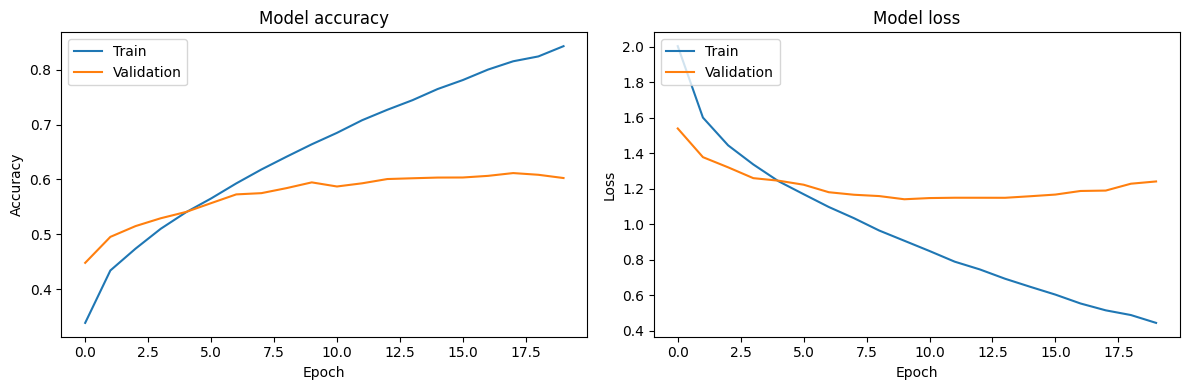

In [ ]:
# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [3]:
from tensorflow.keras.models import load_model

# Model ko load karein
model = load_model('/content/drive/My Drive/facial_emotion_model.h5')  # 'path_to_your_model.h5' ko apne model ke actual path se replace karein


# # Get true labels
# y_true = validation_generator.classes

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Validation Generator se predictions nikalein
y_pred = model.predict(validation_generator)

# Predictions ko appropriate format mein convert karein
y_pred_classes = np.argmax(y_pred, axis=1)

# Validation Generator se actual labels ko extract karein
y_true = validation_generator.classes

# Class labels ka mapping mil sakta hai, jaise ki:
class_labels = list(validation_generator.class_indices.keys())

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))



221/221 [==============================] - 3s 12ms/step
Classification Report:
              precision    recall  f1-score   support

       angry       0.14      0.12      0.13       960
     disgust       0.02      0.01      0.01       111
        fear       0.15      0.12      0.13      1018
       happy       0.26      0.28      0.27      1825
     neutral       0.17      0.19      0.18      1216
         sad       0.14      0.15      0.15      1139
    surprise       0.11      0.12      0.12       797

    accuracy                           0.18      7066
   macro avg       0.14      0.14      0.14      7066
weighted avg       0.17      0.18      0.17      7066



221/221 [==============================] - 7s 32ms/step


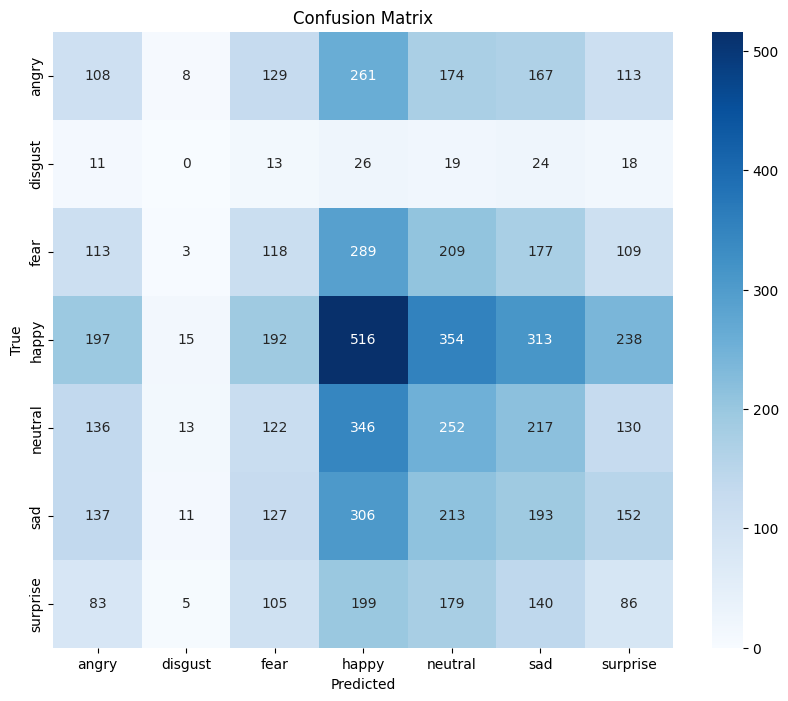

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Validation Generator se predictions nikalein
y_pred = model.predict(validation_generator)

# Predictions ko appropriate format mein convert karein
y_pred_classes = np.argmax(y_pred, axis=1)

# Validation Generator se actual labels ko extract karein
y_true = validation_generator.classes

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Class labels ka mapping mil sakta hai, jaise ki:
class_labels = list(validation_generator.class_indices.keys())

# Confusion Matrix Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()